# Simulating Data 

## Imports 

In [1]:


# standard lib imports 
import sys 
import warnings 

# 3rd party imports 
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# external packages in local directory 
sys.path.append("../simulate-groups")
from simulate_groups import simulate_ll

# removing warning message when using 
warnings.filterwarnings("ignore")



## Simulating Data

In [2]:
# generating labled distribution data 
# n -> samples 
# p -> features (predictiors)
# uncorr_frac -> % of uncorrelated features
# num_groups -> 

# generated data 
# -- X -> features/samples
# -- y -> labels 
# -- info_dict -> (labels) sigma, betas, pis, groups, groups_to_keep, is_correlated
X, y, info_dict = simulate_ll(n=10, p=20, uncorr_frac=0.1, num_groups=5)

In [3]:
# checking how many labled there are in the dictioanry 
# -- sigma contains raw data 
print("Total labels: {}".format(len(info_dict.keys())))
label_names = ", ".join(list(info_dict.keys()))
print(label_names)


Total labels: 6
sigma, betas, pis, groups, groups_to_keep, is_correlated


xlabels: 


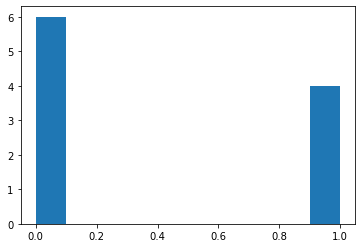

In [4]:
# Plotting labing distribution in a histogram
# NOTE: apply formating edits later 
ax = plt.subplot()
plt.hist(y)

print("xlabels: {}".format(ax.get_xlabel()))


In [5]:

# sns.histplot(y)

<AxesSubplot:>

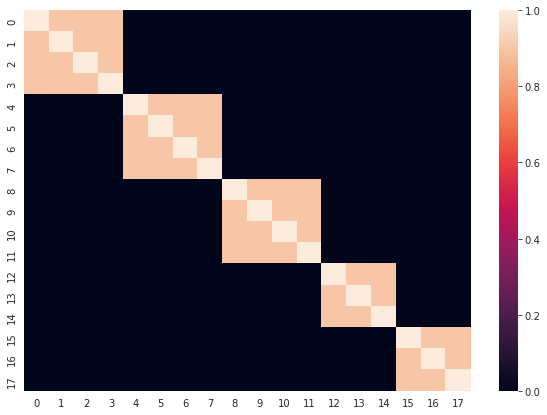

In [6]:
# generated covariance matrix and plotting it 
# -- this is the same shown as the notebook
cov_matrix = info_dict["sigma"]
sns.set({"figure.figsize" : (10, 7)})
sns.heatmap(cov_matrix)


## Making an ElasticNet Model with generated feature labels and feature scores 

In [7]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import ( 
                             average_precision_score,
                             roc_auc_score)

### Searching for the best paramters

In [8]:
# Creating Logistic Regression model by selecting the best paramters 
# -- special paramters:  ‘elasticnet’ penalty and ‘saga’ solver

# spliting data into testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# fitting training data into model to selecct best paramters 
l1_ratios = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]
model_cv = LogisticRegressionCV(cv=3, penalty="elasticnet", solver="saga", l1_ratios=l1_ratios).fit(X_train, y_train)
print("Best l1_ratio paramter is {}".format(model_cv.l1_ratio_[0]))
print("Cs score is {}".format(model_cv.Cs_))



Best l1_ratio paramter is 0.001
Cs score is [1.00000000e-04 7.74263683e-04 5.99484250e-03 4.64158883e-02
 3.59381366e-01 2.78255940e+00 2.15443469e+01 1.66810054e+02
 1.29154967e+03 1.00000000e+04]


Text(0, 0.5, 'score')

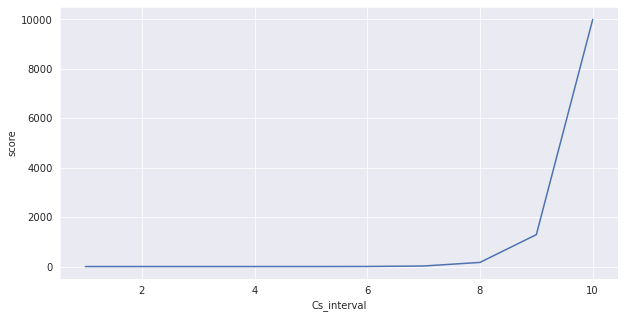

In [25]:
# plotting the cs score 
rows = [i+1 for i in range(len(model_cv.Cs_))]
data= np.array(model_cv.Cs_)
fig, ax = plt.subplots(figsize=(10,5))
sns.lineplot(rows, data)
ax.set_xlabel("Cs_interval")
ax.set_ylabel("score")

In [10]:
# Evaluate the performance of the generated model by using AUPR and AUROC
# prediction
y_pred = model_cv.predict(X_test)

# AUPR
aupr_score = average_precision_score(y_test, y_pred)
print("AUPR score: {}".format(aupr_score))

# AUROC
auroc_score = roc_auc_score(y_test, y_pred)
print("AUROC score: {}".format(auroc_score))


AUPR score: 0.75
AUROC score: 0.5


### Creating Elastic Net Model
based on  Logistic Regression Cross Validation evaluations, the best paramters 

for our data set is to create a Elastic Net model with a l1_ratio of 0.5
